# Dinámica discreta

Al resolver ecuaciones diferenciales de manera numérica usando métodos explícitos (e.g. FTCS) llegamos a ecuaciones iterativas en las que el estado en un paso de tiempo discreto $n+1$ estaba dado por el estado en un paso de tiempo anterior $n$. Por ejemplo, para la ecuación del calor en una dimensión tenemos:
\begin{equation}
u^{n+1}_i = u^n_i + D \frac{\Delta t}{(\Delta x)^2}(u^n_{i+1} - 2u^n_i + u^n_{i-1})
\end{equation}
De manera más general podemos plantear:
$$
\mathbf{u}^{n+1}=f(\mathbf{u}^{n})
$$
donde la función $f:\Re^m\to\Re^m$ puede ser no lineal como en el problema de reacción-difusión y $m$ es el número de componentes de $\mathbf{u}$.

Es instructivo analizar problemas en los que se toma un tiempo discreto como punto de partida. Esto puede tener sentido si el problema tiene una escala de tiempo característica, que para sistemas biológicos podría ser, por ejemplo, el tiempo típico de reproducción o un tiempo asociado a las estaciones del año.

El caso más sencillo es cuando $m=1$, así que tenemos una función $f:\Re\to\Re$ y obtenemos el estado en el paso $n$-ésimo partiendo del estado $x_0$ y componiendo la función $n$ veces:
\begin{align}
x_1&=f(x_0)\\
x_2&=f(x_1)=f(f(x_0))\equiv f^2(x_0)\\
\cdots\\
x_n&=f(x_{n-1})=f^n(x_0)\\
\end{align}

Si $f$ es una función lineal, el problema no tiene mucho interés, pero si introducimos no-linealidades la cosa se pone mucho más interesante. Por ejemplo
$$
f(x)=r x (1-x)
$$
donde  $0\leq r\leq 4$ y $0\leq x\leq 1$, es el famoso **mapeo logístico**. Dependiendo del valor de $r$ da lugar a puntos fijos estables, oscilaciones periódicas y comportamiento caótico (sensibilidad a las condiciones iniciales).




## Mapeo logístico


El mapeo logístico es un modelo matemático que nos va a servir como ejemplo de sistema dinámico no lineal y caótico. Se basa en una ecuación recursiva que genera una serie de números entre 0 y 1, según un parámetro r.

$$
x_{n+1} = r x_n (1 - x_n)
$$

Este mapeo depende de dos variables: $x_n$ y $r$.

1. $x_n$ es el valor actual de la serie.
2. $r$ es una constante que controla la tasa de reproducción.

En cada paso del mapeo, se calcula un nuevo valor $x_{n+1}$ a partir del valor actual $x_n$ multiplicado por la tasa de reproducción $r$ ajustada por la competencia intraespecie $(1 - x_n)$.

Aunque esta ecuación parece simple, produce una gama sorprendentemente compleja de comportamientos a medida que varía el valor de $r$. Para valores bajos de $r$, la serie se estabiliza en un solo valor. Para valores más altos de $r$, se producen bifurcaciones en las que la serie pasa a oscilar entre dos, cuatro, ocho, etc., valores antes de volverse completamente caótica.

Este comportamiento caótico hace que el mapeo logístico sea útil para modelar sistemas en los que pequeñas variaciones en las condiciones iniciales pueden producir resultados muy diferentes, un fenómeno conocido como sensibilidad a las condiciones iniciales. Esto es característico de muchos sistemas naturales y artificiales, incluyendo el clima, las poblaciones biológicas, y los sistemas económicos.

El mapeo logístico da una descripción muy simplificada del comportamiento de una población biológica. Fue propuesto por primera vez como un modelo demográfico por el biólogo Robert May en la década de 1970.

El mapeo logístico es una versión discreta de la ecuación logística,
$$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)$$

que se utilizó inicialmente para modelar cómo una población $P$ crece con el tiempo en un ambiente con recursos limitados. La ecuación logística incluye un término que tiene en cuenta la capacidad de carga del ambiente, o el tamaño máximo $K$ de la población que el ambiente puede sostener.

En el mapeo logístico, la variable $x$ representa la proporción de la población existente con respecto a la población máxima posible (la capacidad de carga), y la variable $r$ representa la máxima tasa posible de reproducción. El mapeo logístico se utiliza para modelar cómo cambia la población de un paso de tiempo al siguiente.

Aunque el mapeo logístico es un modelo muy simplificado que no tiene en cuenta muchos factores que pueden influir en la dinámica de la población en el mundo real (como la estructura de edades, la distribución espacial y las interacciones con otras especies), ha sido muy influyente porque demuestra cómo puede surgir un comportamiento complejo y caótico a partir de sistemas dinámicos no lineales simples. Además, este mapeo contribuyó a entender conceptos fundamentales en la teoría de sistemas dinámicos, como la bifurcación, el caos y la sensibilidad a las condiciones iniciales.

El siguiente código muestra cómo evoluciona $x$ en función del paso de iteración para dos valores distintos de $x_0$ y $r= 2.1$.

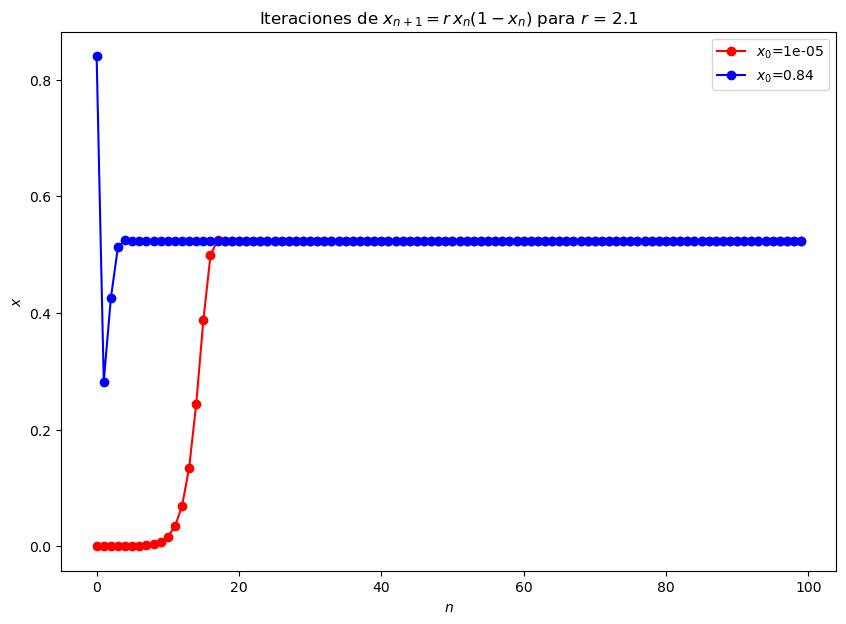

In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def mapeo_logistico(x, r):
    return r * x * (1 - x)

r = 2.1
iteraciones = 100
x = np.zeros(iteraciones)
x[0] = 1e-5 # Condición inicial 1

for i in range(1,iteraciones):
    x[i] = mapeo_logistico(x[i-1], r)

y = np.zeros(iteraciones)

y[0] = 0.84 # Condición inicial 2
for i in range(1,iteraciones):
    y[i] = mapeo_logistico(y[i-1], r)
plt.figure(figsize=(10, 7))
plt.subplot(111)

plt.plot(range(iteraciones), x, '-or', alpha=1.0, label=f"$x_{0}$={x[0]}")
plt.plot(range(iteraciones), y, '-ob', alpha=1.0, label=f"$x_{0}$={y[0]}")
plt.title("Iteraciones de $x_{n+1}=r\\,x_n(1-x_n)$" + f" para $r$ = {r}")
plt.xlabel('$n$')
plt.ylabel('$x$')
plt.legend(loc='upper right')
plt.show()


Vemos que para ambos valores de $x_0$ hay un *transitorio* pero que luego de un número suficientemente grande de pasos el mapeo llega a una situación en la que deja de evolucionar. Este es un punto fijo del mapeo que cumple $x^\star=f(x^\star)$.
Vemos que
$$
x^\star = rx^\star(1-x^\star)
$$
que tiene la soluciones $x^\star=1-1/r$ y $x^\star=0$.

El sistema se acerca al punto $x^\star=1-1/r$ para $r=2.1$. A este tipo de puntos se les llama atractores.


# Atractores
De manera más general, un atractor en un sistema dinámico es un punto (o un conjunto de puntos) hacia el cual el sistema tiende a evolucionar, independientemente de las condiciones iniciales del sistema. Es el valor (o conjunto de valores) en el que el sistema se queda después de un tiempo suficientemente largo. Los atractores pueden ser un punto, un conjunto de puntos, una curva, una variedad, o ser incluso más complejos.

Se distinguen varios tipos de atractores, por ejemplo:

1. **Puntos fijos**: Es el caso que vimos en el ejemplo anterior.

2. **Ciclos límite**: El sistema repite una serie de puntos en el espacio de estados o traza una curva cerrada.

3. **Atractores extraños**: Estos son el tipo más complejo de atractores, asociados con sistemas caóticos. El estado del sistema evoluciona en un patrón no periódico dentro del atractor. El sistema recorre una región reducida en el espacio de estados, pero de una forma no predecible.


El mapeo logístico muestra atractores de estos tres tipos, dependiendo del parámetro $r$.

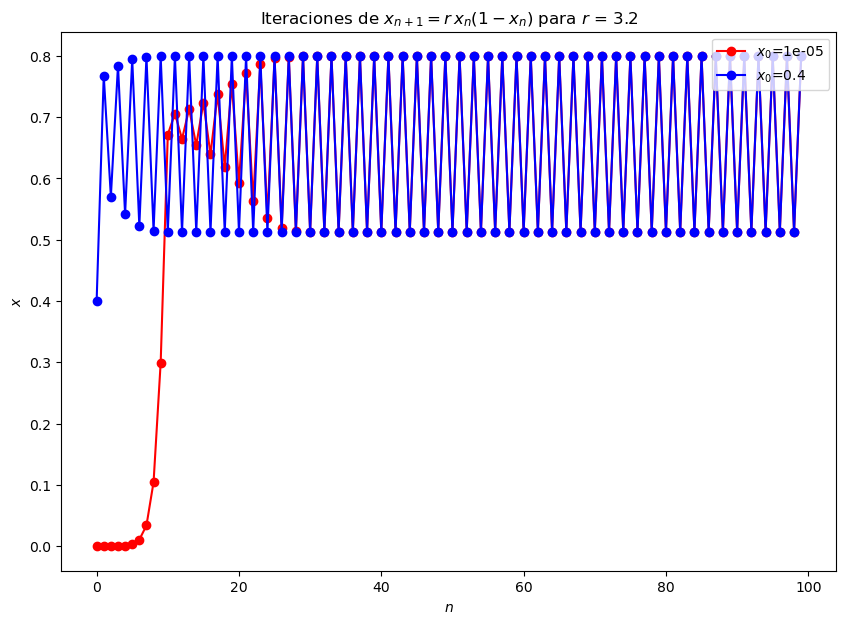

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def mapeo_logistico(x, r):
    return r * x * (1 - x)

r = 3.2
iteraciones = 100
x = np.zeros(iteraciones)
x[0] = 1e-5

for i in range(1,iteraciones):
    x[i] = mapeo_logistico(x[i-1], r)

y = np.zeros(iteraciones)

y[0] = 0.4
for i in range(1,iteraciones):
    y[i] = mapeo_logistico(y[i-1], r)
plt.figure(figsize=(10, 7))
plt.subplot(111)

plt.plot(range(iteraciones), x, '-or', alpha=1.0, label=f"$x_{0}$={x[0]}")
plt.plot(range(iteraciones), y, '-ob', alpha=1.0, label=f"$x_{0}$={y[0]}")
plt.title("Iteraciones de $x_{n+1}=r\\,x_n(1-x_n)$" + f" para $r$ = {r}")
plt.xlabel('$n$')
plt.ylabel('$x$')
plt.legend(loc='upper right')
plt.show()


Para $r=3.2$ el atractor es un ciclo límite que pasa alternadamente por dos puntos, así que cada uno de esos puntos tienen que cumplir $x^\star=f^2(x^\star)$.

## Diagrama de bifurcaciones

El siguiente código hace $1000$ iteraciones del mapeo logístico para valores de $r$ en el rango $[2.5,4]$ y grafica los últimos $100$ puntos.

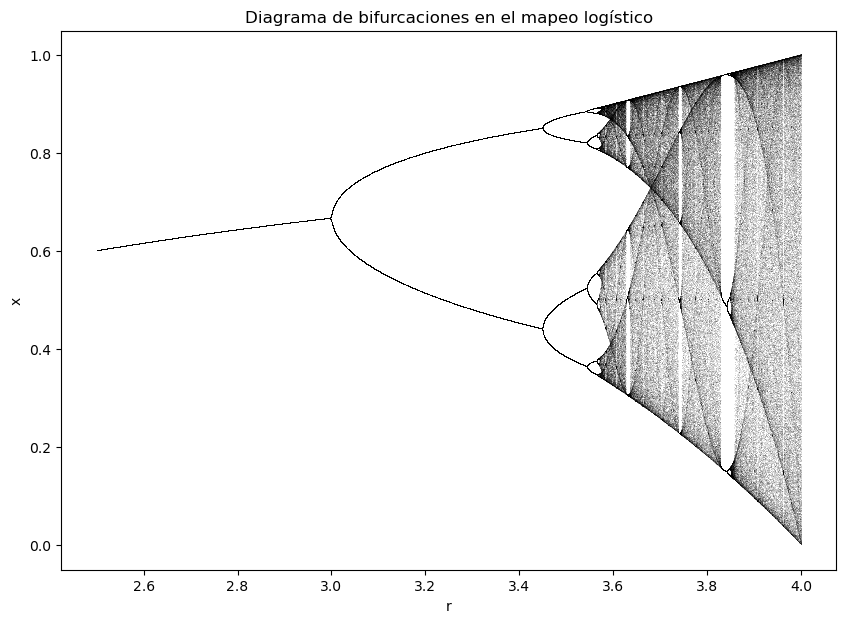

In [3]:
# @title
import numpy as np
import matplotlib.pyplot as plt

n = 10000
r = np.linspace(2.5, 4.0, n)

# Número de iteraciones
iteraciones = 1000
# Iteraciones a graficar
last = 100

# Valores iniciales de x, uno para cada r
x = 1e-5 * np.ones(n)

fig, ax = plt.subplots(figsize=(10, 7))
# ax.subplot(111)
for i in range(iteraciones):
    x = mapeo_logistico(x, r) # aplica el mapeo a todos los pares x y r.
    if i >= (iteraciones - last):
        ax.plot(r, x, ',k', alpha=0.1)
ax.set_title("Diagrama de bifurcaciones en el mapeo logístico")
ax.set_xlabel('r')
ax.set_ylabel('x')
plt.show()


Se ve  que al ir aumentando $r$ se pasa de un punto fijo a ciclos límite de $2$, $4$, $8$ , etc. puntos. Para algunos valores de $r$ el comportamiento se hace más complejo y no se pueden identificar ciclos límite. El atractor en esos casos es extraño.  

## Diagrama de telaraña
Para analizar el comportamiento de este sistema (y en general de mapeos iterativos) es bastante instructivo hacer un diagrama de *telaraña* (cobweb). Para un punto fijo $x^\star$ sabemos que se cumple la condición $f(x^\star)=x^\star$. Por lo que $x^\star$ es donde se cruzan las funciones $y_1=f(x)$  e $y_2=x$ que graficamos en la figura.

Para crear el diagrama partimos de un $x_0$ y trazamos una línea azul vertical desde $(x_0, x_0)$ hasta $(x_0,f(x_0))$, esto nos da el valor de $x_1=f(x_0)$ así que trazamos una línea azul horizontal desde ($x_0,f(x_0)$) hasta $(x_1,x_1)$ y repetimos el proceso con el nuevo valor $x_1$. En algunos casos las líneas azules forman una especie de telaraña.


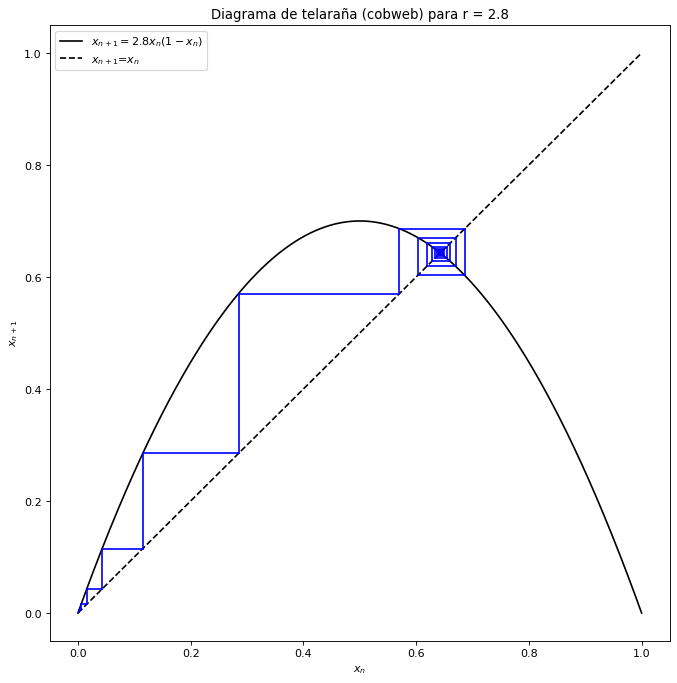

In [4]:
# @title
import matplotlib.pyplot as plt
import numpy as np

def mapeo_logistico(x, r):
    return r * x * (1 - x)

def grafico_telarana(r):
    # Inicializar los valores
    x_valores = np.linspace(0, 1, 1000)
    iteraciones = 100
    x = np.zeros(iteraciones)
    x[0] = 0.002  # valor inicial para la iteración

    # Preparar la figura
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=80)

    # Graficar el mapa logístico
    ax.plot(x_valores, mapeo_logistico(x_valores, r), 'k', label=f"$x_{{n+1}} = {r}x_n(1-x_n)$")

    # Graficar la línea y = x
    ax.plot(x_valores, x_valores, 'k--', label="$x_{n+1}$=$x_n$")

    # Mapeo
    for i in range(1, iteraciones):
        x[i] = mapeo_logistico(x[i-1], r)

    # Generar el gráfico de telaraña
    for i in range(iteraciones-1):
        ax.plot([x[i], x[i]], [x[i], x[i+1]], 'b')
        ax.plot([x[i], x[i+1]], [x[i+1], x[i+1]], 'b')

    ax.legend()

    # Establecer las etiquetas
    ax.set_xlabel("$x_n$")
    ax.set_ylabel("$x_{n+1}$")
    ax.set_title(f"Diagrama de telaraña (cobweb) para r = {r}")

    plt.show()

# r = 2.8
grafico_telarana(2.8)


vemos que para $r=2.8$, el valor converge al punto fijo.
* ¿qué pasa para valores más grandes?

En el caso de un ciclo límite que oscila entre dos valores es útil hacer el mismo análisis pero para la aplicación del mapeo dos veces $f^2(x)$. Al hacer esto, puede verse que puede haber varios valores en los que $x=f^2(x)$ pero que no necesariamente son estables.
* ¿Cuál es la condición de estabilidad?

Se puede continuar este análisis (para $f^{2 p}(x)$ con p un número natural) que es particularmente útil para ver cómo se va duplicando el período de los ciclos límite en el diagrama de bifurcaciones.

# Caos y sensibilidad a las condiciones iniciales

Vimos que al aumentar el parámetro $r$ el sistema comienza con un punto fijo pero por arriba de $r=3$ comienza a haber una serie de duplicaciones del período. Para $r\sim 3.57$ el sistema tiene zonas con comportamiento caótico en los que $x$ salta de un lado a otro con un comportamiento que parece al azar (a pesar de ser un mapeo determinista).

En estas regiones el comportamiento es muy sensible a las condiciones iniciales. Dos valores de $x_0$ que están muy cerca van a pasar por lugares muy distintos luego de un número *relativamente chico* de iteraciones.

Veamos un ejemplo, partimos de $x_0$ y $x_0+\epsilon$ y vemos cómo evoluciona la diferencia con $n$. El eje y del gráfico está en escala logarítmica, así que una recta está asociada a un comportamiento exponencial.


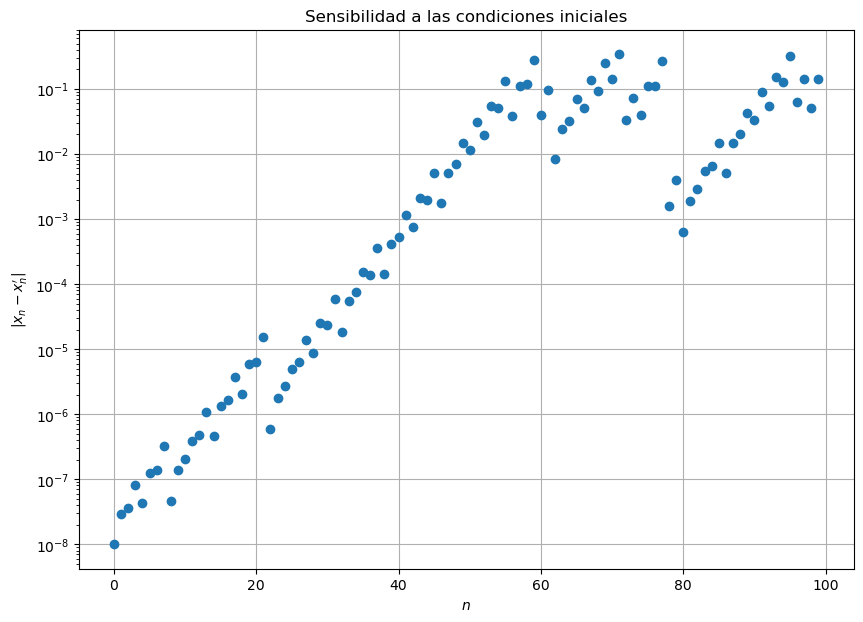

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# r caótico?
r = 3.65

# Dos condiciones iniciales
eps = 1e-8
x_1 = 0.1
x_2 = 0.1 + eps

iteraciones = 100

diferencia = np.zeros(iteraciones)

# Descartamos algunas iteaciones
for i in range(iteraciones):
    diferencia[i] = np.abs(x_1-x_2)
    x_1 = mapeo_logistico(x_1, r)
    x_2 = mapeo_logistico(x_2, r)


plt.figure(figsize=(10, 7))
#plt.subplot(1,1,1)
plt.plot(range(iteraciones), diferencia, 'o')
plt.title("Sensibilidad a las condiciones iniciales")
plt.xlabel('$n$')
plt.ylabel('$|x_n-x^\prime_n|$')
plt.yscale("log")
plt.grid()
plt.show()

 de la figura vemos que para $r=3.65$ la diferencia crece exponencialmente:
 $$
 |x_n-x^\prime_n| \sim |x_o-x^\prime_o| e^{\lambda n}
 $$
 para los $n$ más chicos y luego satura. La saturación es fácil de entender porque en este problema los valores de $x$ están acotados al intervalo $(0,1)$.
 En este caso el valor de $\lambda$ que se conoce como exponente de Lyapunov es positivo que es justamente un indicador de alta sensibilidad a las condiciones iniciales.

 Vemos que para una diferencia de $\epsilon=10^{-8}$ las dos condiciones iniciales tienen un comportamiento muy distinto luego de unas $50$ iteraciones. Esto hace muy difícil predecir el valor de $x_n$. Si hay un error de precisión (debido a la representación de los números en la computadora), dos corridas con la misma condición inicial (usando diferente precisión) pueden darnos resultados muy distintos luego de unas pocas iteraciones.

## Exponentes de Lyapunov

El exponente de Lyapunov es una medida de la sensibilidad del sistema a las condiciones iniciales. Si $\lambda< 0$ dos condiciones iniciales muy cercanas convergen. Si $\lambda> 0$ se separan exponencialmente. Del gráfico anterior podríamos obtener $\lambda$ de la pendiente para $r$ chico, pero ese valor podría depender un poco del valor de $x_0$ o del $\epsilon$ que elegimos.

Una forma astuta de calcular el exponente $\lambda(r)$ en este problema, sin tener que investigar diferentes valores de $x_0$ o $\epsilon$ es a partir de la definición de más arriba
$$
\lambda=\frac{1}{n}\ln\left|\frac{\Delta x_n}{\Delta x_0}\right|
$$
donde $\Delta x_n=x_n-x^\prime_n$.

Pero:
$$
\begin{align}
\frac{\Delta x_n}{\Delta x_0}&=\frac{1}{\Delta x_0} \frac{\Delta x_1}{\Delta x_1}\frac{\Delta x_2}{\Delta x_2}\cdots \frac{\Delta x_{n-1}}{\Delta x_{n-1}}\frac{\Delta x_n}{1}\\
&=\frac{\Delta x_1}{\Delta x_0}\frac{\Delta x_2}{\Delta x_1}\cdots \frac{\Delta x_{n}}{\Delta x_{n-1}}\\
&=\prod_{i=0}^{n-1}\frac{\Delta x_{i+1}}{\Delta x_{i}}
\end{align}
$$
reemplazando llegamos a
$$
\lambda=\frac{1}{n}\sum_{i=0}^{n-1}\ln\left|\frac{\Delta x_{i+1}}{\Delta x_i}\right|
$$
pero si $\epsilon\to 0$:
$$
\frac{\Delta x_{i+1}}{\Delta x_i} \to \frac{d x_{i+1}}{d x_i}= \left. \frac{df(x)}{dx}\right|_{x_i}\equiv f'(x_i)
$$
Por lo que nos queda
$$
\lambda=\frac{1}{n}\sum_{i=0}^{n-1}\ln\left|f'(x_i)\right|
$$
Así que si comenzamos con algún $x_0\neq\{0,1\}$ al ir iterando vamos promediar el efecto de diferentes condiciones iniciales. El promedio no es un promedio sobre todos las posibles condiciones iniciales porque van a tener un peso más grande los valores de $x$ más visitados.

En el código de abajo se hace el cálculo. Se ven regiones de estabilidad ($\lambda< 0$) y regiones caóticas ($\lambda>0$).


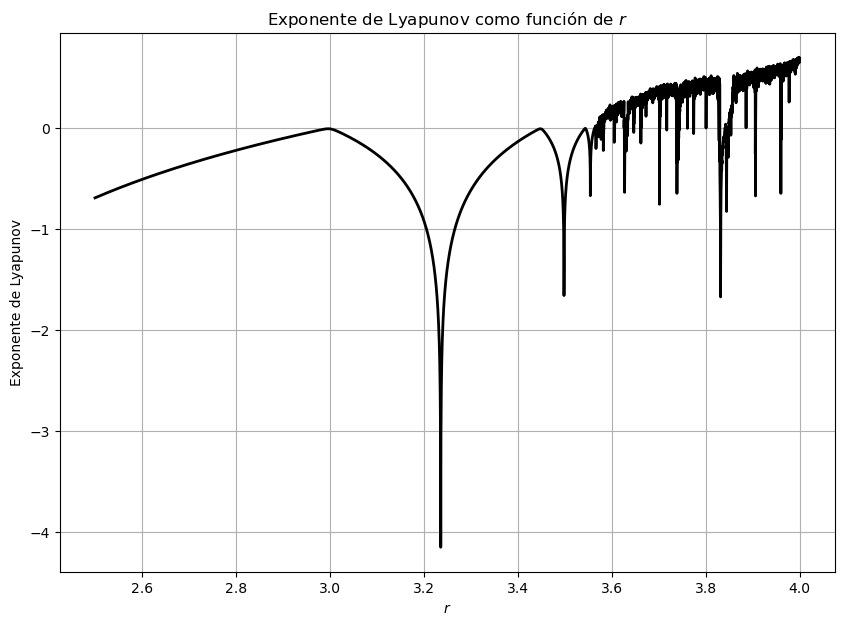

In [8]:
# @title
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(2.5, 4.0, n)
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

# Descartamos algunas iteaciones
for i in range(iteraciones):
    x = mapeo_logistico(x, r)

for i in range(iteraciones):
    x = mapeo_logistico(x, r)
    # Usamos la fórmula de la derivada para el cálculo del exponente
    lyapunov += np.log(abs(r - 2*r*x))

lyapunov /= iteraciones

plt.figure(figsize=(10, 7))
#plt.subplot(1,1,1)
plt.plot(r, lyapunov, 'k', linewidth=2)
plt.title("Exponente de Lyapunov como función de $r$")
plt.xlabel('$r$')
plt.ylabel('Exponente de Lyapunov')
plt.grid()
plt.show()
